**Problem Statement**


Improve the content delivery and customer engagement using the context of the available source of news articles.

**Objective**



1. The goal of the project is to use a bunch of news articles extracted from the companies internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content.
2. Utilize embedding techniques like Bag of Words and TF-IDF.
3. Utilize techniques like Tree based and distance based for Topic Modelling.
4. Perform label/ordinal encoding on target column 'Category'.
5. Perform multiclass classification with Naive Bayes, Decision Tree, Nearest Neighbors, Random Forest.
6. Evaluate the models performance and plot the Confusion Matrix as well as Classification Report.



In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#------------------------------------------Libraries---------------------------------------------------------------#
####################################################################################################################
#-------------------------------------Generic Imports---------------------------------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#-------------------------------------Text Preprocessing---------------------------------------------------------#
import re
import contractions
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
import nltk
nltk.download('punkt')
nltk.download('wordnet')
#------------------------------------Metrics and Validation---------------------------------------------------------#
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
#-------------------------------------Models ----------------------------------------------------------#
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
#####################################################################################################################
from yellowbrick.text import FreqDistVisualizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_csv('flipitnews-data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.head(2)

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...


In [ ]:
df[pd.isnull(df['Category'])] # no row with a blank Category

,Category,Article


In [ ]:
df.duplicated().sum()

99

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2126 non-null   object
 1   Article   2126 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


<Axes: >

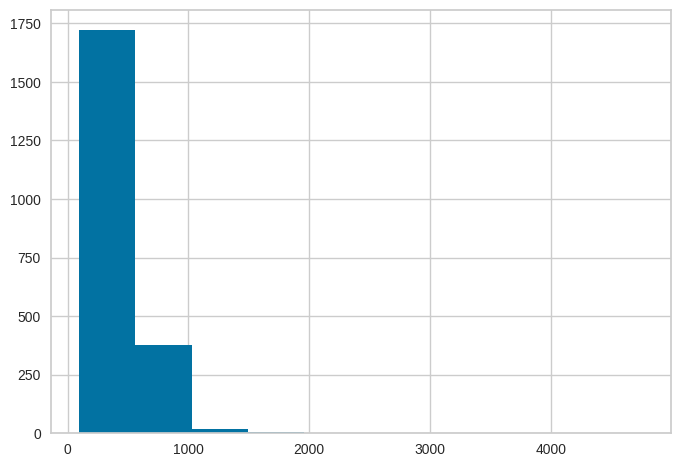

In [ ]:
df['Article'].apply(lambda x: len(x.split(' '))).hist()

In [ ]:
print(df['Article'].apply(lambda x: len(x.split(' '))).sum())

893008


In [ ]:
df.groupby('Category').Article.count()

Category
Business         503
Entertainment    369
Politics         403
Sports           504
Technology       347
Name: Article, dtype: int64

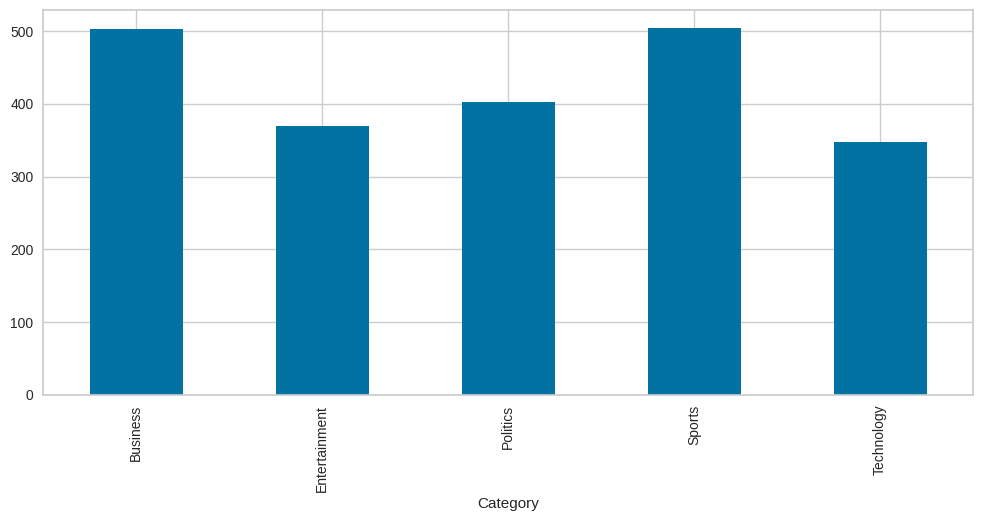

In [ ]:
fig = plt.figure(figsize=(12,5))
df.groupby('Category').Article.count().plot.bar(ylim=0)
plt.show()

The Dataset is sufficietly balaced.

In [ ]:
def print_plot(index):
    example = df[df.index == index][['Article', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])

In [ ]:
print_plot(250)

wenger handed summer war chest arsenal boss arsene wenger has been guaranteed transfer funds to boost his squad the summer.  the club s managing director  keith edelman  stressed that the development of their new £350m stadium had no affect on wenger s spending power.  the money is there. don t worry we ve got it   edelman told bbc sport.  hopefully  we ll spend it this summer and in the coming years. arsene attends all our board meetings and he knows our finances are very strong.   edelman added that it was pointless having a brand new stadium if the team did not match the surroundings.  its great to have nice  new surroundings  but if the team aren t performing on the pitch  then there isn t great respect in having a fabulous stadium   he said.  it s important that we had sufficient funds for our team in place  before we began on the stadium.
Category: Sports


In [ ]:
def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    wordnet_lemmatizer = WordNetLemmatizer()
    english_stopwords = stopwords.words('english')
    for punct in punctuation:
      english_stopwords.append(punct)
    text = re.compile('[/(){}\[\]\|@,;]').sub(' ', text)
    text = re.compile('[^0-9a-z #+_]').sub('', text)
    expanded_text = contractions.fix(text)
    text = ' '.join([wordnet_lemmatizer.lemmatize(w, pos="v") for w in word_tokenize(expanded_text.lower()) if w not in english_stopwords and w.isalpha()]) # remove stopwors from text
    return text

In [ ]:
df['filtered_text'] = df['Article'].apply(clean_text)

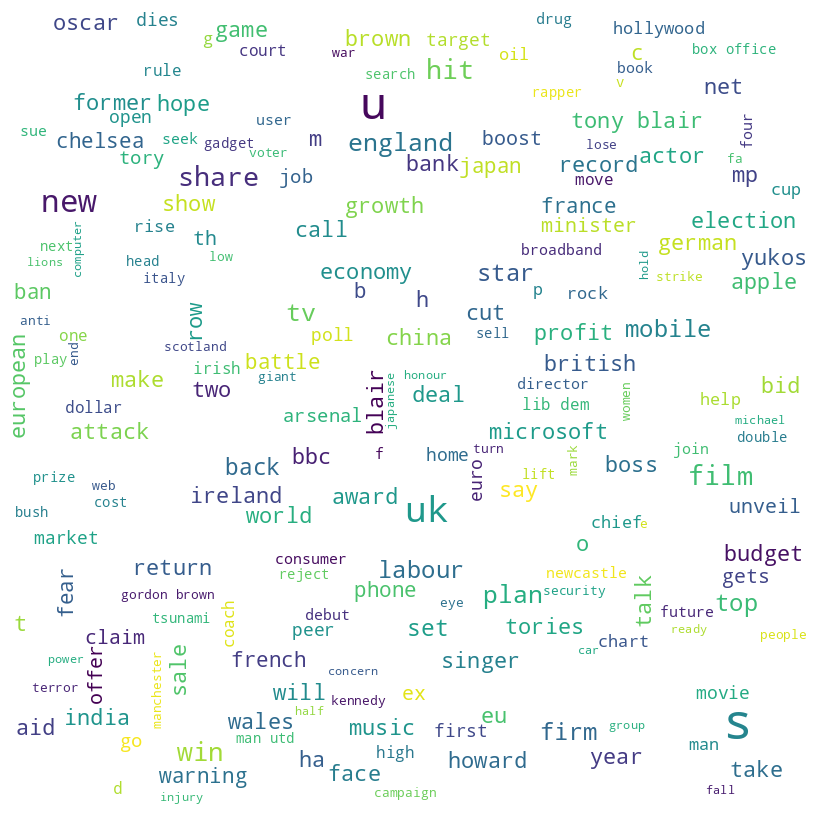

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_font_size = 50,
                min_font_size = 10).generate(df['Article'].to_string())
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
def top10_bycategory(category):
  all_text = " ".join(df[df.Category == category].filtered_text)
  count = pd.DataFrame(all_text.split(), columns = ['words'])
  top_10 = count[count['words'].isin(list(count.words.value_counts()[:10].index[:10]))]
  plt.figure(figsize=(10,5))
  sns.barplot(x = top_10.words.value_counts().index,
              y = top_10.words.value_counts(), palette = sns.color_palette("mako"))

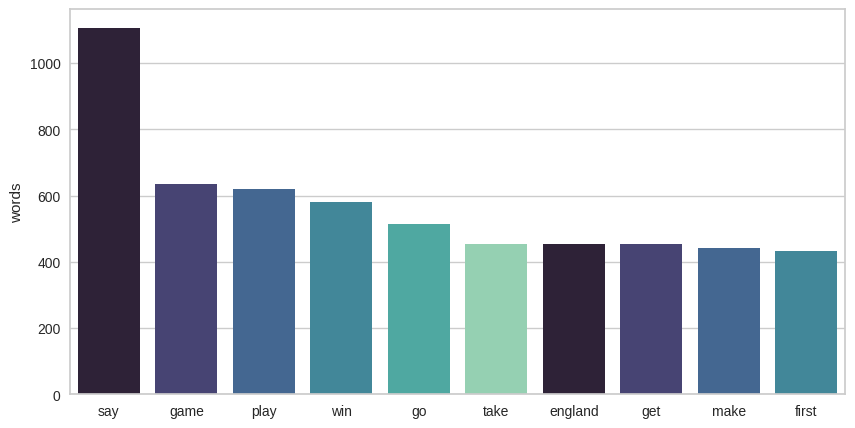

In [ ]:
top10_bycategory("Sports")

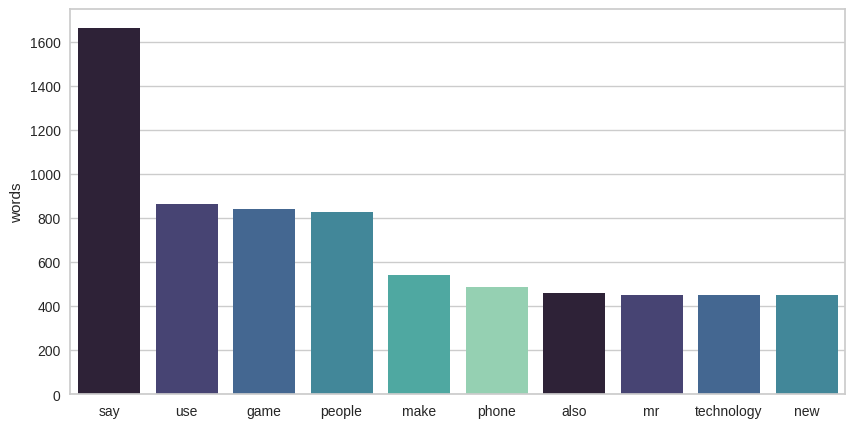

In [ ]:
top10_bycategory("Technology")

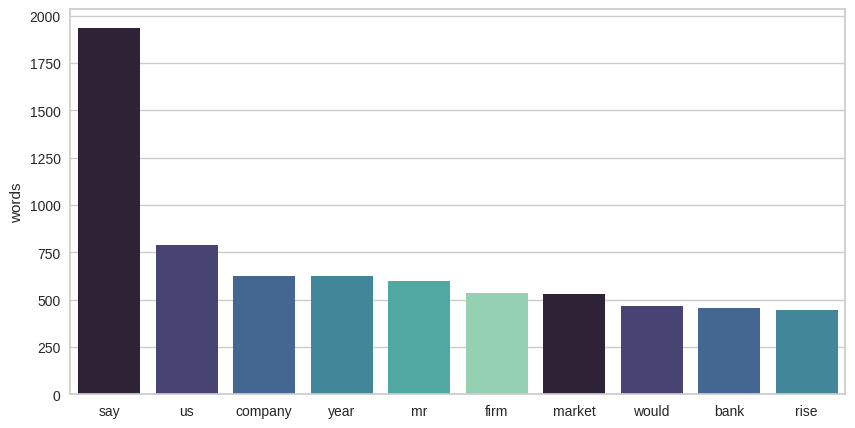

In [ ]:
top10_bycategory("Business")

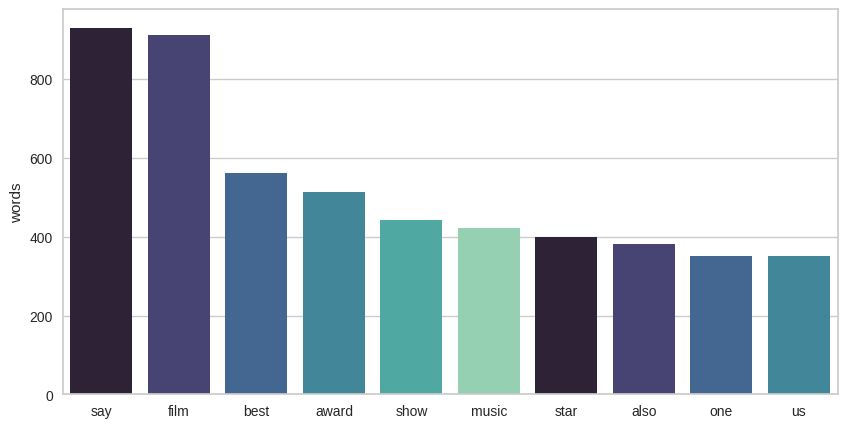

In [ ]:
top10_bycategory("Entertainment")

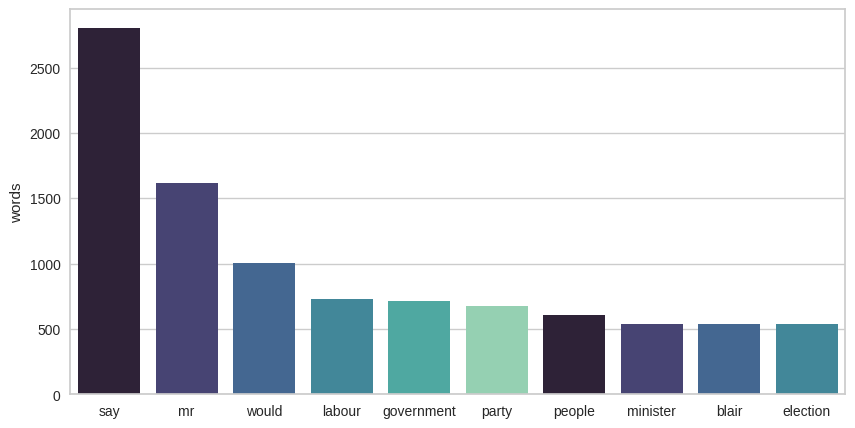

In [ ]:
top10_bycategory("Politics")

In [ ]:
df.head(2)

,Category,Article,filtered_text
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewers home theatre systems pl...
1,Business,worldcom boss left books alone former worldc...,worldcom boss leave book alone former worldcom...


In [ ]:
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df.Category.values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.Article.values, y,
                                                   stratify=y,
                                                   random_state=42, test_size=0.2)

**Tf-idf**

In [ ]:
tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=True,smooth_idf=True,sublinear_tf=True,
            stop_words = 'english')
# Fit and transform Tf-idf to both training and test sets
tfidf.fit(list(X_train) + list(X_test))
X_train_tfidf =  tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Bag of Words**

In [ ]:
countvec = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english', binary=True)
# Fit and transform CountVectorizer to both training and test sets
countvec.fit(list(X_train) + list(X_test))
X_train_countvec =  countvec.transform(X_train)
X_test_countvec = countvec.transform(X_test)

In [ ]:
target_names=lbl_enc.classes_
target_names

array(['Business', 'Entertainment', 'Politics', 'Sports', 'Technology'],
      dtype=object)

**Fitting Naive Bayes on Tf-idf**

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---Test Set Results---
Accuracy with NB: 0.9812206572769953
Cohen Kappa score: 0.9763805721889555
               precision    recall  f1-score   support

     Business       0.97      0.97      0.97       101
Entertainment       0.97      0.97      0.97        74
     Politics       1.00      0.99      0.99        81
       Sports       1.00      1.00      1.00       101
   Technology       0.96      0.97      0.96        69

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426



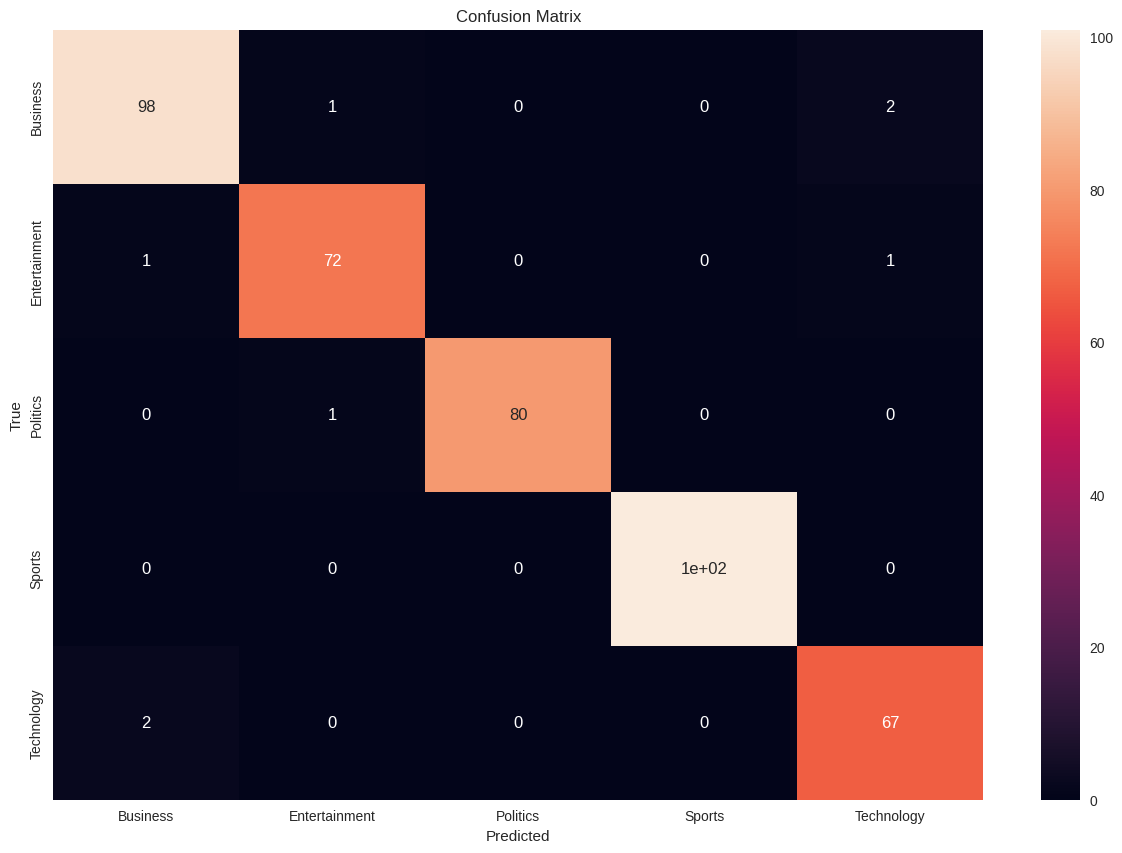

In [ ]:
alpha = np.arange(0, 1, 0.001)
fit_prior = [True, False]

params = {
    'alpha' : alpha,
    'fit_prior' : fit_prior
}

random_search = RandomizedSearchCV(
    estimator = MultinomialNB(),
    param_distributions = params,
    n_iter = 100,
    cv = 3,
    n_jobs = -1,
    random_state = 1,
    verbose = 1
).fit(X_train_tfidf, y_train)

model_mnb = random_search.best_estimator_
model_mnb.score(X_train_tfidf, y_train)
y_pred = model_mnb.predict(X_test_tfidf)
print("---Test Set Results---")
print("Accuracy with NB: {}".format(accuracy_score(y_test, y_pred)))
print("Cohen Kappa score: {}".format(cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(target_names),
            yticklabels=(target_names))

**Fitting Naive Bayes on BOW**

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---Test Set Results---
Accuracy with NB: 0.9765258215962441
Cohen Kappa score: 0.970471212898396
               precision    recall  f1-score   support

     Business       0.96      0.96      0.96       101
Entertainment       0.96      0.99      0.97        74
     Politics       0.99      0.99      0.99        81
       Sports       1.00      1.00      1.00       101
   Technology       0.97      0.94      0.96        69

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426



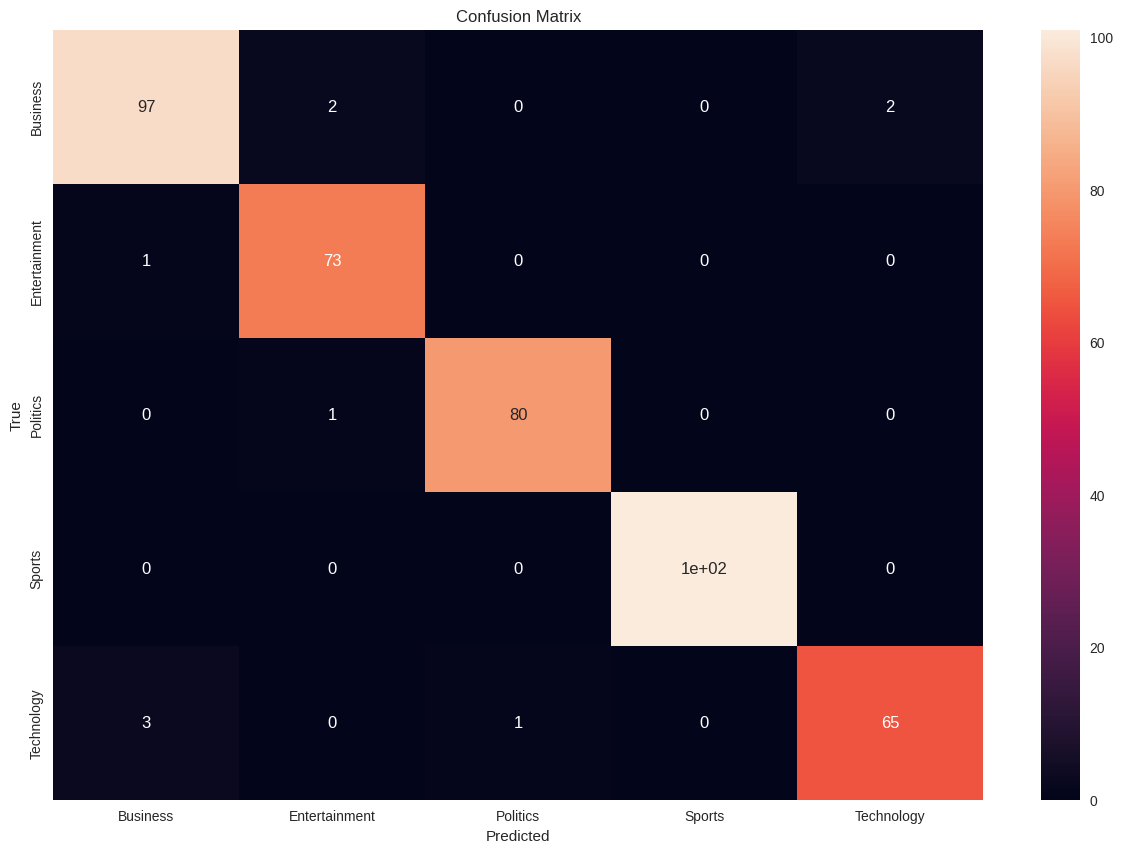

In [ ]:
alpha = np.arange(0, 1, 0.001)
fit_prior = [True, False]

params = {
    'alpha' : alpha,
    'fit_prior' : fit_prior
}

random_search = RandomizedSearchCV(
    estimator = MultinomialNB(),
    param_distributions = params,
    n_iter = 100,
    cv = 3,
    n_jobs = -1,
    random_state = 1,
    verbose = 1
).fit(X_train_countvec, y_train)

model_mnb = random_search.best_estimator_
model_mnb.score(X_train_countvec, y_train)
y_pred = model_mnb.predict(X_test_countvec)

print("---Test Set Results---")
print("Accuracy with NB: {}".format(accuracy_score(y_test, y_pred)))
print("Cohen Kappa score: {}".format(cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(target_names),
            yticklabels=(target_names))

**Fitting Random Forest on Tf-idf**

In [ ]:
RFclf = RandomForestClassifier()
RFclf.fit(X_train_tfidf, y_train)
y_pred = RFclf.predict(X_test_tfidf)
print("---Test Set Results---")
print("Accuracy with RF: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

---Test Set Results---
Accuracy with RF: 0.9342723004694836
               precision    recall  f1-score   support

     Business       0.85      0.99      0.91       101
Entertainment       0.99      0.89      0.94        74
     Politics       0.99      0.88      0.93        81
       Sports       0.94      1.00      0.97       101
   Technology       0.98      0.87      0.92        69

     accuracy                           0.93       426
    macro avg       0.95      0.93      0.93       426
 weighted avg       0.94      0.93      0.93       426



**Fitting Random Forest on BOW**

In [ ]:
RFclf = RandomForestClassifier()
RFclf.fit(X_train_countvec, y_train)
y_pred = RFclf.predict(X_test_countvec)
print("---Test Set Results---")
print("Accuracy with RF: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

---Test Set Results---
Accuracy with RF: 0.9366197183098591
               precision    recall  f1-score   support

     Business       0.85      1.00      0.92       101
Entertainment       0.97      0.92      0.94        74
     Politics       0.99      0.89      0.94        81
       Sports       0.94      1.00      0.97       101
   Technology       1.00      0.83      0.90        69

     accuracy                           0.94       426
    macro avg       0.95      0.93      0.93       426
 weighted avg       0.94      0.94      0.94       426



**Fitting Xgboost on Tf-idf**

In [ ]:
Xgbclf = xgb.XGBClassifier(n_jobs=-1)
Xgbclf.fit(X_train_tfidf.tocsc(), y_train)
y_pred = Xgbclf.predict(X_test_tfidf.tocsc())
print("---Test Set Results---")
print("Accuracy with Xgboost: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

---Test Set Results---
Accuracy with Xgboost: 0.9507042253521126
               precision    recall  f1-score   support

     Business       0.92      0.97      0.94       101
Entertainment       0.94      0.91      0.92        74
     Politics       0.99      0.96      0.97        81
       Sports       0.97      0.99      0.98       101
   Technology       0.94      0.90      0.92        69

     accuracy                           0.95       426
    macro avg       0.95      0.95      0.95       426
 weighted avg       0.95      0.95      0.95       426



**Fitting Xgboost with BOW**

In [ ]:
Xgbclf = xgb.XGBClassifier(n_jobs=-1)
Xgbclf.fit(X_train_countvec.tocsc(), y_train)
y_pred = Xgbclf.predict(X_test_countvec.tocsc())
print("---Test Set Results---")
print("Accuracy with Xgboost: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

---Test Set Results---
Accuracy with Xgboost: 0.9647887323943662
               precision    recall  f1-score   support

     Business       0.93      0.98      0.96       101
Entertainment       0.97      0.95      0.96        74
     Politics       0.99      0.96      0.97        81
       Sports       0.98      0.99      0.99       101
   Technology       0.96      0.93      0.94        69

     accuracy                           0.96       426
    macro avg       0.97      0.96      0.96       426
 weighted avg       0.97      0.96      0.96       426



**KNeighbour Classifier with TF-IDF**

In [ ]:
n_neighbors = range(5, 100)
weights = ['distance']
algorithm = ['auto']
leaf_size = range(30, 100,2)
p = range(1, 4)

params = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'leaf_size' : leaf_size,
    'p'  : p
}

random_search = RandomizedSearchCV(
    estimator = KNeighborsClassifier(n_jobs = -1),
    param_distributions = params,
    n_iter = 100,
    cv = 3,
    n_jobs = -1,
    random_state = 1,
    verbose = 1
).fit(X_train_tfidf, y_train)

random_search.best_params_
model_knc = random_search.best_estimator_
model_knc.score(X_train_tfidf, y_train)
y_pred = model_knc.predict(X_test_tfidf)

print("---Test Set Results---")
print("Accuracy with KNC: {}".format(accuracy_score(y_test, y_pred)))
print("Cohen Kappa score: {}".format(cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(target_names),
            yticklabels=(target_names))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


**KNeighbour Classifier with BOW**

In [ ]:
n_neighbors = range(5, 100)
weights = ['distance']
algorithm = ['auto']
leaf_size = range(30, 100,2)
p = range(1, 4)

params = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'leaf_size' : leaf_size,
    'p'  : p
}

random_search = RandomizedSearchCV(
    estimator = KNeighborsClassifier(n_jobs = -1),
    param_distributions = params,
    n_iter = 100,
    cv = 3,
    n_jobs = -1,
    random_state = 1,
    verbose = 1
).fit(X_train_countvec, y_train)

random_search.best_params_
model_knc = random_search.best_estimator_
model_knc.score(X_train_countvec, y_train)
y_pred = model_knc.predict(X_test_countvec)

print("---Test Set Results---")
print("Accuracy with KNC: {}".format(accuracy_score(y_test, y_pred)))
print("Cohen Kappa score: {}".format(cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(target_names),
            yticklabels=(target_names))


**Misclassified:**

In [ ]:
for x, y, y_hat in zip(X_test, lbl_enc.inverse_transform(y_test), lbl_enc.inverse_transform(y_pred)):
    if y != y_hat:
        print(f'Article: {x} Category: {y} Category_pred: {y_hat}')

Questionnaire:

Q1: How many news articles are present in the dataset that we have?

Ans: 2225 Articles in the provided dataset. After 99 duplicate rows were removed, we were left with 2126 for training and testing.

Q2: Most of the news articles are from _____ category.

Ans: Sports

Q3: Only ___ no. of articles belong to the ‘Technology’ category.

Ans: 347 Artcles after removing duplicates

Q4: What are Stop Words and why should they be removed from the text data?

Ans: Stop Words are common words that have little or no value in determining the meaning or topic of a text.These are language specific. Removing Stopwords helps reducing noise, improves accuracy and efficiency.

Q5: Explain the difference between Stemming and Lemmatization.

Ans: Stemming involves removing the suffixes (and sometimes prefixes) from a word to obtain its base or root form.
Lemmatization involves determining the base form of a word (the lemma) based on its context. Unlike stemming, lemmatization considers the context of the word and the part of speech.

In general, stemming is useful for tasks that require speed and efficiency, such as indexing large collections of text, while lemmatization is useful for tasks that require higher accuracy, such as language translation or text classification.

Q6: Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

Ans: TF-IDF is considered to be more efficient than BoW because it takes into account the importance of the words in the corpus, whereas BoW only considers their frequency. TF-IDF gives more weight to rare words that are more likely to carry meaning and less weight to common words that are less informative.

Q7: What’s the shape of train & test data sets after performing a 75:25 split.

Ans: After removing duplicate 2126 records were left,
No. of training records : 1594
No. of testing records : 531.5 ~ 532

Q8: Which of the following is found to be the best performing model ?

Ans: Accuracy with NB and TF-IDF: 0.9812206572769953 was the best model.